## **Latar Belakang**

Sebuah perusahaan memiliki kumpulan data dari transaksi customer selama dua tahun terakhir. Perusahaan ingin melakukan *Customer Personality Analysis* terhadap populasi customernya agar dapat membantu perusahaan dalam membuat perencanaan penjualan yang lebih tepat dan *marketing campaign* yang lebih efektif.

## **Rumusan Masalah**

1. Bagaimana karakteristik customer yang membeli produk berdasarkan usia, pendapatan, status perkawinan, dan jumlah anak?
2. Bagaimana efektifitas campaign terhadap populasi customer?

## **Data Understanding**

Untuk menjawab rumusan masalah diatas, maka saya akan menganalisis data yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses pada link berikut [[LinkDataset]](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). Dataset ini memiliki 29 variable yang dikelompokkan menjadi 5 kelompok dengan detail sebagai berikut:

* People
    - ID: ID unik customer
    - Year_Birth: Tahun lahir customer
    - Education: Level pendidikan customer
    - Marital_Status: Status pernikahan customer
    - Income: Pendapatan rumah tangga tahunan customer
    - Kidhome: Jumlah anak kecil yang dimiliki customer
    - Teenhome: Jumlah remaja yang dimiliki customer
    - Dt_Customer: Tanggal pendaftaran customer ke perusahaan
    - Recency: Jumlah hari sejak customer melakukan pembelian terakhir
    - Complain: 1 jika customer complain dalam 2 tahun terakhir, 0 sebaliknya
<br><br>
* Products
    - MntWines: Jumlah yang dibelanjakan untuk Wine dalam 2 tahun terakhir
    - MntFruits: Jumlah yang dibelanjakan untuk Buah dalam 2 tahun terakhir
    - MntMeatProducts: Jumlah yang dibelanjakan untuk Daging dalam 2 tahun terakhir
    - MntFishProducts: Jumlah yang dibelanjakan untuk Ikan dalam 2 tahun terakhir
    - MntSweetProducts: Jumlah yang dibelanjakan untuk produk Makanan Manis dalam 2 tahun terakhir
    - MntGoldProds: Jumlah yang dibelanjakan untuk Emas dalam 2 tahun terakhir
<br><br>
* Promotion
    - NumDealsPurchases: Jumlah pembelian yang menggunakan diskon
    - AcceptedCmp1: 1 jika customer menerima penawaran dari campaign ke-1, 0 sebaliknya
    - AcceptedCmp2: 1 jika customer menerima penawaran dari campaign ke-2, 0 sebaliknya
    - AcceptedCmp3: 1 jika customer menerima penawaran dari campaign ke-3, 0 sebaliknya 
    - AcceptedCmp4: 1 jika customer menerima penawaran dari campaign ke-4, 0 sebaliknya
    - AcceptedCmp5: 1 jika customer menerima penawaran dari campaign ke-5, 0 sebaliknya
    - Response: 1 jika customer menerima penawaran dari campaign terakhir, 0 sebaliknya
<br><br>
* Place
    - NumWebPurchases: Jumlah pembelian yang dilakukan melalui website perusahaan
    - NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
    - NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
    - NumWebVisitsMonth: Jumlah kunjungan ke website perusahaan dalam sebulan terakhir
<br><br>
* Others
    - Z_CostContact: Kolom irrelevan dengan dataset "Customer Personality Analysis"
    - Z_Revenue: Kolom irrelevan dengan dataset "Customer Personality Analysis"

## **Data Preparation**
---

### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu

### **Loading Dataset**

In [2]:
# Membaca data CSV dengan menampilkan data 5 baris pertama
pd.set_option('display.max_columns', None)

df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## **Data Wrangling**
---

### **Check Informasi Dataset**

In [3]:
print(f'Jumlah baris dataset: {df.shape[0]}\nJumlah kolom dataset: {df.shape[1]}')

Jumlah baris dataset: 2240
Jumlah kolom dataset: 29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


<u>Observasi</u>

- Terdapat 3 variabel dengan tipe data object yaitu `Education`, `Marital_Status`, dan `Dt_Customer`:
    - `Education` terdapat 5 nilai unik. Akan dikelompokkan menjadi kelompok yang lebih sederhana
    - `Marital_Status` terdapat 8 nilai unik. Akan dikelompokkan menjadi kelompok yang lebih sederhana
    - `Dt_Customer` akan diubah menjadi tipe datetime.
- Variabel lainnya berupa data numerikal (integer / float).

### Check Duplikat Data

In [6]:
print(f' Jumlah data yang memiliki duplikat: {df.duplicated().sum()}')

 Jumlah data yang memiliki duplikat: 0


### Check Missing & Unique Values

In [7]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].isna().sum(),
        round((df[i].isna().sum())/(df[i].isna().count())*100,2),
        df[i].nunique(),
        df[i].sample(2).values
    ])

pd.DataFrame(data=dataDesc,columns=['Column','Null','% Null','No. Unique Values', 'Sample of Unique Values'])

,Column,Null,% Null,No. Unique Values,Sample of Unique Values
0,ID,0,0.00,2240,"[3599, 9668]"
1,Year_Birth,0,0.00,59,"[1981, 1973]"
2,Education,0,0.00,5,"[Graduation, Graduation]"
3,Marital_Status,0,0.00,8,"[Single, Married]"
4,Income,24,1.07,1974,"[94472.0, 19656.0]"
5,Kidhome,0,0.00,3,"[0, 1]"
6,Teenhome,0,0.00,3,"[1, 1]"
7,Dt_Customer,0,0.00,663,"[19-09-2013, 23-11-2013]"
8,Recency,0,0.00,100,"[23, 48]"
9,MntWines,0,0.00,776,"[292, 19]"


<u>Observasi</u>

- `Income` memiliki missing value sebanyak 24 baris (1,07%). 
- `Z_CostContact` dan `Z_Revenue` memiliki 1 value yang sama pada setiap barisnya.

### Handling Missing Values

Untuk menangani *missing value*, terdapat 2 cara yang dapat dilakukan:
1. Mengisi *missing value*
2. Menghapus *missing value*

Karena jumlah *missing value* dalam dataset ini (var. `Income`) tergolong rendah (1,07%), sehingga saya akan menghapus missing value pada variabel tersebut.

In [8]:
df = df.dropna()
print(f'Jumlah missing value saat ini: {df.isna().sum().sum()}')

Jumlah missing value saat ini: 0


### Drop Irrelevant Columns

Pada dataset ini, ditemukan bahwa `Z_CostContact` dan `Z_Revenue` memiliki value yang sama pada setiap barisnya dan tidak relevan pada dataset. Sehingga kedua kolom tersebut akan saya drop.

In [9]:
# Menghapus kolom yang tidak relevan

df = df.drop(['Z_CostContact','Z_Revenue'],axis=1)

### Kolom `Year_Birth`

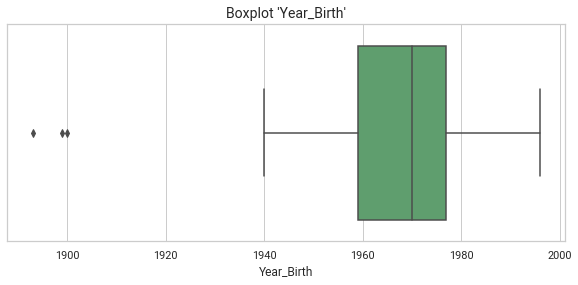

In [10]:
# Check outlier
sns.set_theme(style='whitegrid',font='Roboto')

plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='Year_Birth',color='g')
plt.title("Boxplot 'Year_Birth'",size=14);

In [11]:
# Menampilkan nilai batas bawah (lowerbound) pada 'Year_Birth'

nilaiIQR = df['Year_Birth'].quantile(0.75)-df['Year_Birth'].quantile(0.25)
lowerbound = df['Year_Birth'].quantile(0.25) - (1.5*nilaiIQR)
print(f'Batas lowerbound pada "Year_Birth" adalah: {lowerbound.astype(int)}')

Batas lowerbound pada "Year_Birth" adalah: 1932


In [12]:
# Menampilkan data customer yang lahir pada tahun dibawah dari nilai lowerbound

outlier_YB = df[df['Year_Birth'] < lowerbound]
outlier_YB

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


Pada variabel `Year_Birth`, diketahui bahwa terdapat 3 customer yang lahir pada tahun 1900 ke bawah (outlier). Data outlier ini saya asumsikan sebagai salah input data karena kecil kemungkinan terdapat customer yang berusia diatas 100 tahun. Sehingga data outlier ini akan saya drop.

In [13]:
# Drop 3 data outlier 'Year_Birth'

df = df.drop(outlier_YB.index)

Kemudian untuk kebutuhan analisis, saya akan mengubah var. `Year_Birth` menjadi `Age` (berdasarkan tahun 2022) dan dikelompokkan berdasarkan generasinya. Alasannya adalah agar dapat mengetahui karakteristik pembelian produk dan efektivitas *marketing campaign* berdasarkan kelompok usianya. Pengelompokkannya adalah sebagai berikut:
1. Young Adult (usia 18-35 tahun)
2. Mid-Age Adult (usia 36-55 tahun)
3. Older Adult (usia ≥ 56 tahun)

In [14]:
# Membuat function pengelompokkan tahun lahir

def age_class(umur):
    
    if 18 <= umur <= 35:
        return 'Young Adult'
    elif 36 <= umur <= 55:
        return 'Mid-Age Adult'
    else:
        return 'Older Adult'
        
# Mengubah kolom 'Year_Birth' menjadi kolom 'Age' as per 2022
df['Year_Birth'] = 2022 - df['Year_Birth']
df.rename(columns={'Year_Birth':'Age'},inplace=True)

# Mengelompokkan usia berdasarkan generasinya
df['Age_Class'] = df['Age'].apply(age_class)
df['Age_Class'] = pd.Categorical(df.Age_Class, categories=['Young Adult','Mid-Age Adult','Older Adult'])

### Kolom `Education`

Pada var. `Education` terdapat 5 nilai yang berbeda yaitu *Graduation*, *PhD*, *Master*, *2n Cycle*, dan *Basic*. Dikarenakan terdapat nilai yang tidak umum, sehingga saya akan ubah nilai-nilai tersebut menjadi 3 kelompok, yaitu *Bachelor*, *Master*, dan *Doctoral*.

In [15]:
# Melihat unique value dari var. Education

df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [16]:
# Mengkategorikan 'Education' menjadi 3 kelompok

df['Education'] = df['Education'].replace({'Basic':'Bachelor','Graduation':'Bachelor','2n Cycle':'Master','PhD':'Doctoral'})
df['Education'] = pd.Categorical(df.Education, categories=['Bachelor','Master','Doctoral'])
df['Education'].unique()

['Bachelor', 'Doctoral', 'Master']
Categories (3, object): ['Bachelor', 'Master', 'Doctoral']

### Kolom `Marital_Status`

Var. `Marital_Status` juga memiliki 8 nilai yang berbeda yaitu *Married*, *Together*, *Single*, *Divorced*, *Widow*, *Alone*, *Absurd* dan *YOLO*. Dikarenakan terdapat nilai yang tidak umum, sehingga saya akan ubah *Alone*, *Absurd* dan *YOLO* menjadi *Single*.

In [17]:
# Melihat unique value dan jumlah valuenya dari var. Marital_Status

df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [18]:
# Mengkategorikan 'YOLO', 'Absurd', 'Alone' ke dalam 'Single'

df['Marital_Status'] = df['Marital_Status'].replace({'YOLO':'Single','Absurd':'Single','Alone':'Single'})
df['Marital_Status'] = pd.Categorical(df.Marital_Status, categories=['Single', 'Together', 'Married', 'Divorced', 'Widow'])
df['Marital_Status'].unique()

['Single', 'Together', 'Married', 'Divorced', 'Widow']
Categories (5, object): ['Single', 'Together', 'Married', 'Divorced', 'Widow']

### Kolom `Income`

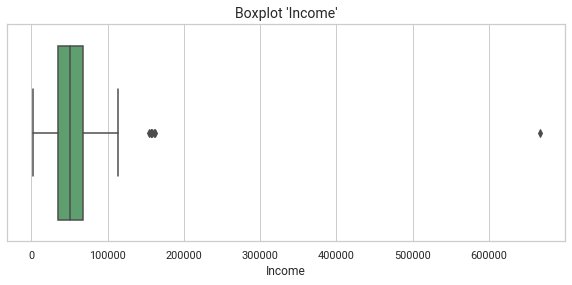

In [19]:
# Check outlier
plt.figure(figsize=(10,4))
sns.boxplot(data=df,x='Income',color='g')
plt.title("Boxplot 'Income'",size=14);

In [20]:
# Menampilkan nilai batas atas (upperbound) pada 'Income'

nilaiIQR = df['Income'].quantile(0.75)-df['Income'].quantile(0.25)
upperbound = df['Income'].quantile(0.75) + (1.5*nilaiIQR)
print(f'Batas upperbound pada "Income" adalah: {upperbound}')

Batas upperbound pada "Income" adalah: 118348.5


In [21]:
outlier_I = df[df['Income'] > upperbound].tail(1)
outlier_I

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_Class
2233,9432,45,Bachelor,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,Mid-Age Adult


Pada variabel `Income`, diketahui bahwa datanya tidak terdistribusi normal dan terdapat 1 customer yang memiliki pendapatan lebih dari $600.000 (outlier). Data outlier ini saya asumsikan sebagai salah input data, sehingga data outlier ini akan saya drop.

In [22]:
# Drop 1 data outlier 'Income'

df = df.drop(outlier_I.index)

Kemudian untuk kebutuhan analisis, saya akan mengelompokkan pendapatan customer menjadi 3 tipe kategori. Alasan pengelompokkan ini adalah agar dapat mengetahui karakteristik pembelian produk dan efektivitas *marketing campaign* berdasarkan level pendapatannya. Pengelompokkannya adalah sebagai berikut:
1. Low (nilai Income sampai nilai quantile-25)
2. Medium (nilai quantile-25 sampai nilai quantile-75)
3. High (nilai quantile-75 ke atas)

In [23]:
df['Income_Class'] = ['Low' if x <= df['Income'].quantile(0.25)
                        else 'Medium' if x > df['Income'].quantile(0.25) and x < df['Income'].quantile(0.75)
                        else 'High' for x in df['Income'].values]

df['Income_Class'] = pd.Categorical(df.Income_Class, categories=['Low','Medium','High'])
df['Income_Class'].unique()

['Medium', 'High', 'Low']
Categories (3, object): ['Low', 'Medium', 'High']

### Kolom `Kidhome` & `Teenhome`

Untuk kedua kolom ini, saya akan menggabungkan nilai dari masing-masing kolom dan mengubah nama kolom menjadi `Num_Children`. Hal ini agar dapat mengetahui proporsi customer berdasarkan jumlah anak yang dimiliki.

In [24]:
df['Kidhome'] = df['Kidhome'] + df['Teenhome']
df.rename(columns={'Kidhome':'Num_Children'},inplace=True)
df.drop(columns='Teenhome',inplace=True)

### Kolom `Dt_Customer`

In [25]:
# Mengubah format tipe data menjadi menjadi datetime
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, dayfirst=True)

### Rename Kolom di Kategori Product

In [26]:
df.rename(columns={'MntWines':'Wines',
                   'MntFruits':'Fruits',
                   'MntMeatProducts':'Meat',
                   'MntFishProducts':'Fish',
                   'MntSweetProducts':'Sweets',
                   'MntGoldProds':'Gold'},
                   inplace=True)

df.head()

,ID,Age,Education,Marital_Status,Income,Num_Children,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age_Class,Income_Class
0,5524,65,Bachelor,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,Older Adult,Medium
1,2174,68,Bachelor,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,Older Adult,Medium
2,4141,57,Bachelor,Together,71613.0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,Older Adult,High
3,6182,38,Bachelor,Together,26646.0,1,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,Mid-Age Adult,Low
4,5324,41,Doctoral,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,Mid-Age Adult,Medium


### Kolom Tambahan Lainnya

In [27]:
df['Expenses'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']

`Expenses` dibuat untuk menjumlahkan total belanja produk dalam dua tahun terakhir.

In [28]:
df['Total_Purch'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

`Total_Purch` dibuat untuk menjumlahkan banyaknya pembelian dari masing-masing purchase sourse-nya.

In [29]:
df['Total_AccCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

`Total_AccCmp` dibuat untuk menjumlahkan total penerimaan *campaign* dari masing-masing customer, dimulai dari *campaign* ke-1 sampai *campaign* yang terakhir.

### Clean Data and Export Data

In [30]:
# Mengurutkan kolom sesuai dengan bentuk data yang diinginkan
df = df[['ID', 'Age', 'Age_Class', 'Education', 'Marital_Status', 'Income', 'Income_Class', 'Num_Children',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Expenses', 
       'NumDealsPurchases', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purch',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'Response', 'Total_AccCmp', 'Complain']].reset_index().drop(columns='index').copy()
           
df.head()

,ID,Age,Age_Class,Education,Marital_Status,Income,Income_Class,Num_Children,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Expenses,NumDealsPurchases,NumWebVisitsMonth,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purch,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total_AccCmp,Complain
0,5524,65,Older Adult,Bachelor,Single,58138.0,Medium,0,2012-09-04,58,635,88,546,172,88,88,1617,3,7,8,10,4,22,0,0,0,0,0,1,1,0
1,2174,68,Older Adult,Bachelor,Single,46344.0,Medium,2,2014-03-08,38,11,1,6,2,1,6,27,2,5,1,1,2,4,0,0,0,0,0,0,0,0
2,4141,57,Older Adult,Bachelor,Together,71613.0,High,0,2013-08-21,26,426,49,127,111,21,42,776,1,4,8,2,10,20,0,0,0,0,0,0,0,0
3,6182,38,Mid-Age Adult,Bachelor,Together,26646.0,Low,1,2014-02-10,26,11,4,20,10,3,5,53,2,6,2,0,4,6,0,0,0,0,0,0,0,0
4,5324,41,Mid-Age Adult,Doctoral,Married,58293.0,Medium,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,5,3,6,14,0,0,0,0,0,0,0,0


In [31]:
# Menampilkan jumlah baris dan kolom dari data yang sudah di cleansing
df.shape

(2212, 31)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Age                  2212 non-null   int64         
 2   Age_Class            2212 non-null   category      
 3   Education            2212 non-null   category      
 4   Marital_Status       2212 non-null   category      
 5   Income               2212 non-null   float64       
 6   Income_Class         2212 non-null   category      
 7   Num_Children         2212 non-null   int64         
 8   Dt_Customer          2212 non-null   datetime64[ns]
 9   Recency              2212 non-null   int64         
 10  Wines                2212 non-null   int64         
 11  Fruits               2212 non-null   int64         
 12  Meat                 2212 non-null   int64         
 13  Fish                 2212 non-nul

Setelah cleaning data dilakukan, maka didapatkan dataset yang sudah bersih dengan detail sebagai berikut:
- Jumlah baris dataset terbaru: 2212 baris
- Jumlah kolom dataset terbaru: 31 kolom
- Tipe data:
    - 4 tipe data 'category'
    - 1 tipe data 'float64'
    - 25 tipe data 'int64'
    - 1 tipe data 'object'


Dataset sudah di-cleaning, maka dataset akan diexport ke dalam file .xlsx untuk selanjutnya divisualisasikan ke Tableau.

In [33]:
df.to_excel('clean_marketing_campaign.xlsx', sheet_name='Data Clean', index=False)


## **Data Analysis**
---

Setelah data cleaning dilakukan, tahap selanjutnya adalah data analisis untuk dapat menjawab rumusan masalah dibawah ini yaitu:
1. Bagaimana karakteristik customer yang membeli produk berdasarkan usia, pendapatan, status perkawinan, dan jumlah anak?
2. Bagaimana efektifitas campaign terhadap populasi customer?

Dari rumusan masalah diatas, akan saya mendetailkannya menjadi beberapa business question sebagai berikut:
- Kelompok usia mana yang melakukan pembelian produk paling banyak dalam 2 tahun terakhir?
- Bagaimana `Expenses` dari masing-masing kelompok usia berdasarkan produk yang dibeli?
- Bagaimana hubungan korelasi antara `Expense` vs `Income` customer?
- Customer dengan `Marital_Status` seperti apa yang melakukan pembelian produk paling banyak dalam 2 tahun terakhir?
- Bagaimana hubungan korelasi antara `Expense`, `Income`, dan `Num_Children`?
- Pada channel manakah customer lebih banyak membeli produknya (web, catalog, store)?
- Bagaimana respon customer terhadap marketing campaign yang telah dibuat? 

### **Business Question 1**

Kelompok usia mana yang melakukan pembelian produk paling banyak dalam 2 tahun terakhir?

In [34]:
# Menampilkan `Age_Class` yang paling banyak mengeluarkan uang untuk membeli produk
df.groupby('Age_Class').sum()[['Expenses']]

,Expenses
Age_Class,
Young Adult,99365
Mid-Age Adult,619184
Older Adult,624728


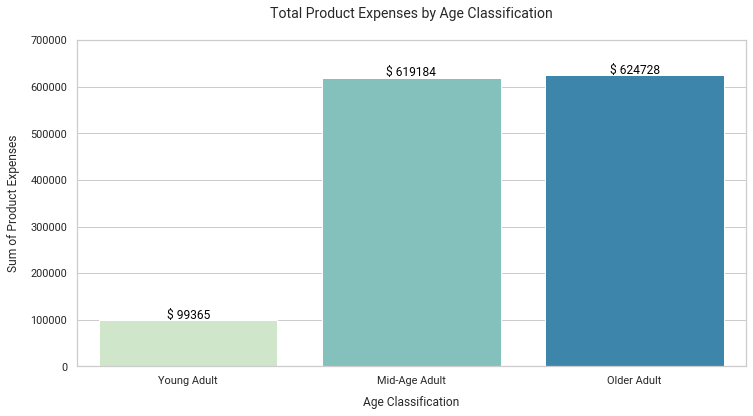

In [35]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df, x='Age_Class', y='Expenses', estimator=sum, palette='GnBu', ci=0)
plt.title('Total Product Expenses by Age Classification\n',size=14)
plt.xlabel('Age Classification',labelpad=10)
plt.ylabel('Sum of Product Expenses',labelpad=10)
plt.ylim(0,700000);

for p in ax.patches:
    ax.annotate(f'$ {p.get_height()}', (p.get_x()+0.4, p.get_height()+25000), ha='center', va='top', color='black', size=12)

In [36]:
# Menampilkan proporsi customer berdasarkan kelompok usianya
round(df['Age_Class'].value_counts() / len(df)*100,1)

Mid-Age Adult    52.9
Older Adult      40.5
Young Adult       6.6
Name: Age_Class, dtype: float64

Berdasarkan tabel dan grafik diatas, kita dapat mengetahui bahwa:
- Customer Older Adult paling tinggi dalam mengeluarkan uang untuk belanja dalam 2 tahun terakhir sejumlah $624.728 (berbeda sedikit dengan customer Mid-Age Adult).
- Customer Young Adult paling rendah dalam mengeluarkan uang untuk belanja  dalam 2 tahun terakhir sejumlah $99.365.

Perbedaan ini disebabkan oleh proporsi customer yang tidak merata berdasarkan kelompok usianya, dimana proporsi customer Young Adult hanya 6.6% dari total populasi customer. Serta meskipun proporsi customer Older Adult lebih rendah dari Mid-Age Adult, namun total expensenya sedikit lebih banyak dari Mid-Age Adult.

### **Business Question 2**

Bagaimana `Expenses` dari masing-masing kelompok usia berdasarkan produk yang dibeli?

In [37]:
# Menampilkan dataframe total expenses berdasarkan produk
product_name = list(df.iloc[:,10:16].columns)

product_detail_expenses = pd.DataFrame({
    'Product' : product_name,
    'Sales': [df[i].sum() for i in product_name]
}).sort_values('Sales',ascending=False)
    
product_detail_expenses

,Product,Sales
0,Wines,675296
2,Meat,369470
5,Gold,97164
3,Fish,83279
4,Sweets,59827
1,Fruits,58241


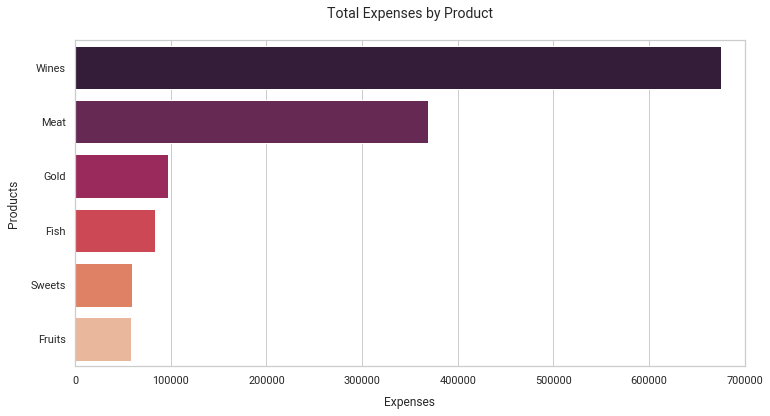

In [38]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=product_detail_expenses, x='Sales', y='Product', palette='rocket', ci=0)
plt.title('Total Expenses by Product\n',size=14)
plt.xlabel('Expenses',labelpad=10)
plt.ylabel('Products',labelpad=10)
plt.xlim(0,700000);

Jika berdasarkan jenis produk yang banyak dibeli dalam 2 tahun terakhir, diketahui bahwa:
- Wine menjadi produk yang paling banyak dibeli oleh customer dengan total penjualan $675.296.
- Fruites menjadi produk yang paling sedikit dibeli oleh customer dengan total penjualan $58.241.

Untuk lebih memperinci, saya akan menampilkan total expense dari masing-masing produk berdasarkan kelompok usianya.

In [39]:
# Menampilkan 'Expenses' per kelompok usianya berdasarkan produk yang dibeli
groupby_YS = df.groupby('Age_Class').sum().iloc[:,5:11].reset_index()
groupby_YS

,Age_Class,Wines,Fruits,Meat,Fish,Sweets,Gold
0,Young Adult,42256,5049,33477,6680,4872,7031
1,Mid-Age Adult,302379,28240,173223,39777,29188,46377
2,Older Adult,330661,24952,162770,36822,25767,43756


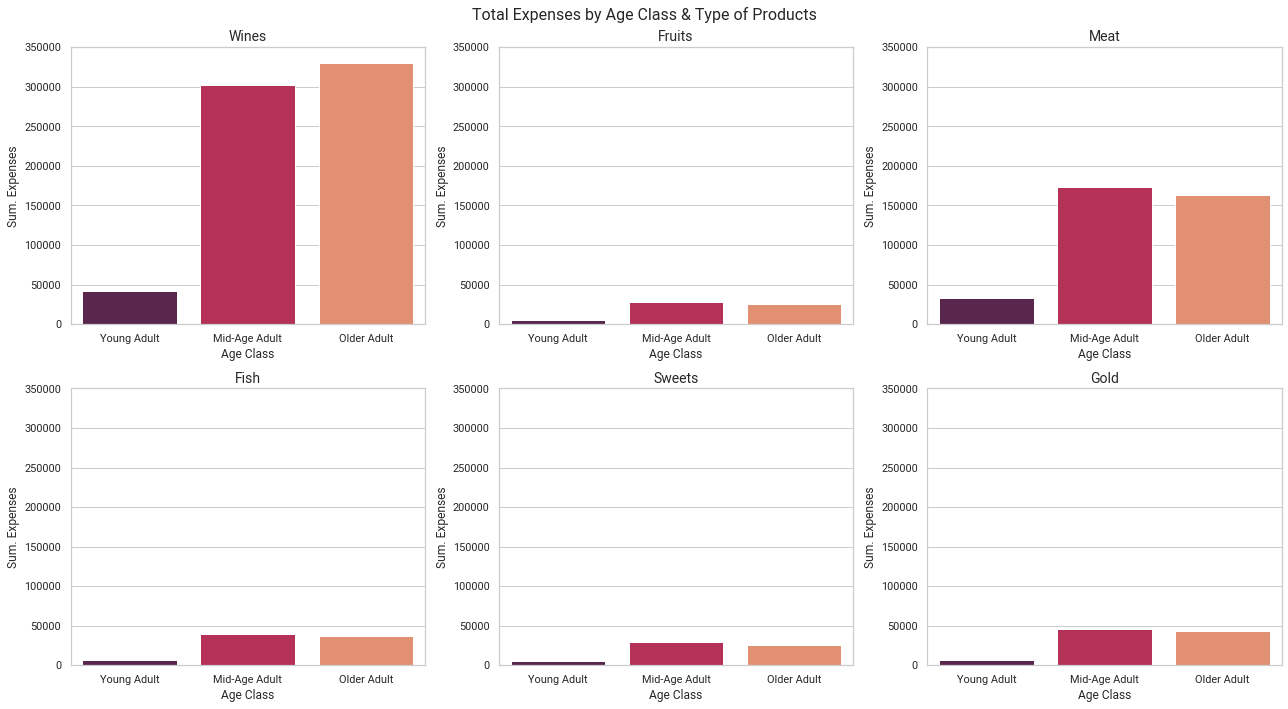

In [40]:
fig = plt.figure(figsize=(18,10))

fig.suptitle('Total Expenses by Age Class & Type of Products',size=16)

num_subplot = 1

for i in groupby_YS.iloc[:,1:].columns:
    plt.subplot(2,3,num_subplot)
    sns.barplot(data=groupby_YS, x='Age_Class', y=i, palette='rocket', estimator=sum)
    plt.title(i,size=14)
    plt.xlabel('Age Class')
    plt.ylabel('Sum. Expenses')
    plt.ylim(0,350000)
    num_subplot += 1

plt.tight_layout();

Apabila diperinci total expensenya berdasarkan produk dan kelompok usianya, diketahui bahwa:
- Dari 6 produk yang dijual, 5 diantaranya dibeli paling banyak dari customer Mid-Age Adult. Produk-produk tersebut adalah Fruits, Meat, Fish, Sweets, dan Gold.
- Produk Wines dibeli paling banyak oleh customer Older Adult.
- Sejalan dengan business question 1, customer Young Adult juga menjadi customer dengan expense terendah berdasarkan pembelian masing-masing produk.

Penjelasan data diatas adalah harga Wine biasanya cenderung lebih mahal daripada harga produk lainnya (selain Gold) dan konsumsi Wine di US tahun 2021 didominasi oleh kelompok *Boomers* (tahun lahir 1946-1964, minimal usia 58 tahun saat ini), oleh karena itu pembelian Wine terbanyak adalah dari customer Older Adult. Kemudian customer Mid-Age Adult juga membelanjakan uangnya lebih banyak pada produk lain selain Wine sehingga hal ini melengkapi business question 1 dimana `Expenses` customer Mid-Age Adult mendekati total `Expenses` dari kelompok Older Adult.

### **Business Question 3**

Bagaimana hubungan korelasi antara `Expense` vs `Income` customer?

In [41]:
# Menampilkan median 'Income' berdasarkan dan 'Age_Class'
# Mengambil nilai median karena data 'Income' tidak terdistribusi normal (ditampilkan di bagian Data Wrangling) sehingga mengambil median sebagai ukuran pusat data
df.groupby('Age_Class').median()[['Income']]

,Income
Age_Class,
Young Adult,42193.5
Mid-Age Adult,44556.5
Older Adult,57724.5


Dilihat dari tabel summary diatas, untuk nilai median `Income` kelompok Young Adult dan Mid-Age Adult tidak dapat dipastikan apakah berbeda signifikan atau tidak. Sehingga untuk menguji hipotesis tersebut, saya akan melakukan uji statistik dengan Mann-Whitney.

In [42]:
# - Ho: Median income Young Adult = Median income Mid-Age Adult
# - Ha: Median income Young Adult != Median income Mid-Age Adult

stat, pvalue = mannwhitneyu(
    df[df['Age_Class']=='Young Adult']['Income'],
    df[df['Age_Class']=='Mid-Age Adult']['Income']
)

if pvalue > 0.05:
    print(f'pvalue = {pvalue:5f}. pvalue > 0.05. Fail to reject Ho.\nTIDAK punya cukup bukti bahwa median income Young Adult TIDAK SAMA DENGAN median income Mid-Age Adult')
else:
    print(f'pvalue = {pvalue:5f}. pvalue <= 0.05. Reject Ho.\nPunya cukup bukti bahwa median income Young Adult TIDAK SAMA DENGAN median income Mid-Age Adult')

pvalue = 0.734316. pvalue > 0.05. Fail to reject Ho.
TIDAK punya cukup bukti bahwa median income Young Adult TIDAK SAMA DENGAN median income Mid-Age Adult


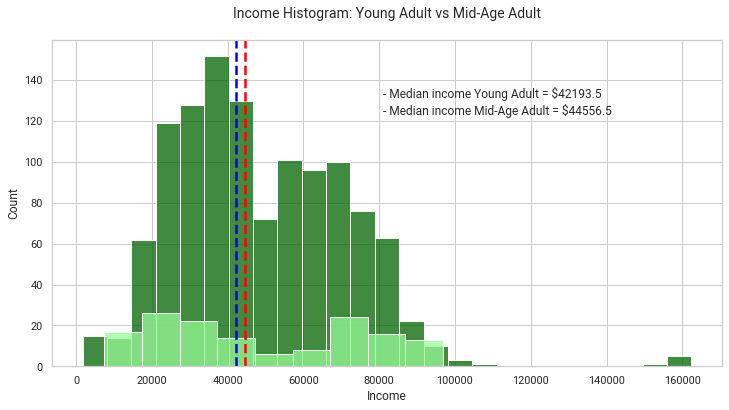

In [43]:
young = df[df['Age_Class'] == 'Young Adult']
mid_age = df[df['Age_Class'] == 'Mid-Age Adult']

# Hisplot Mid-Age Adult
plt.figure(figsize=(12,6))
sns.histplot(data=mid_age, x='Income', color='darkgreen')
plt.axvline(x=mid_age['Income'].median(),
            color='red',
            ls='--', 
            lw=2.5)

# Hisplot Young Adult
sns.histplot(data=young, x='Income', color='palegreen')
plt.axvline(x=young['Income'].median(),
            color='blue',
            ls='--', 
            lw=2.5)

text_lineplot = f'''
- Median income Young Adult = ${young['Income'].median()}
- Median income Mid-Age Adult = ${mid_age['Income'].median()}
'''

plt.text(x=81000,y=116,s=text_lineplot, fontsize=12)
plt.title('Income Histogram: Young Adult vs Mid-Age Adult\n', size=14);

Dari hasil uji statistik dan visualisasi histogram dari `Income` diatas, menunjukkan bahwa median `Income` kelompok Young Adult dinyatakan *tidak berbeda signifikan* dengan median `Income` kelompok Mid-Age Adult (pvalue = 0.734316, Failed to reject Ho).

In [44]:
# Menampilkan 'Expenses' berdasarkan 'Income_Class' dan 'Age_Class'
df.groupby('Age_Class').sum()[['Expenses']]

,Expenses
Age_Class,
Young Adult,99365
Mid-Age Adult,619184
Older Adult,624728


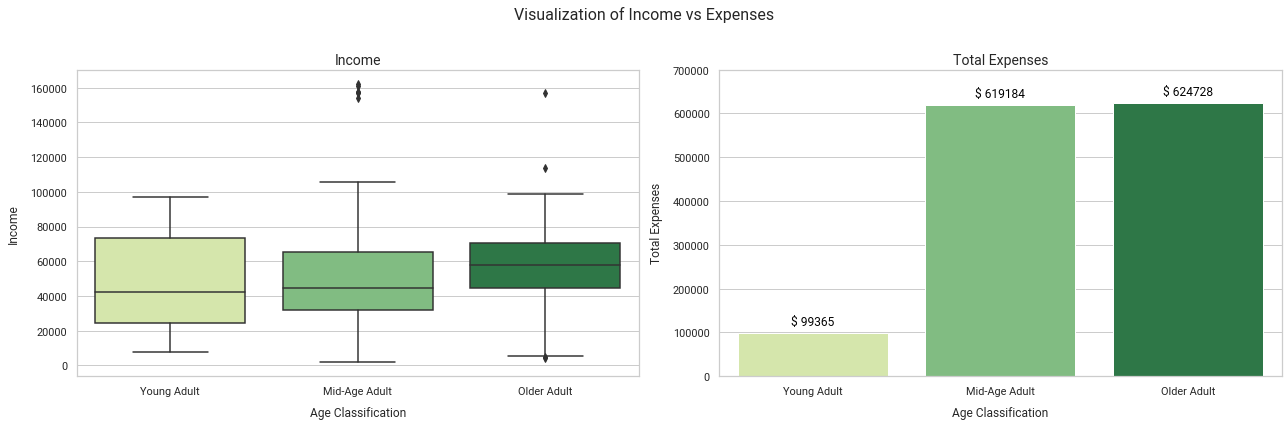

In [45]:
fig = plt.figure(figsize=(18,6))

fig.suptitle('Visualization of Income vs Expenses\n', size=16)

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Age_Class', y='Income', palette='YlGn')
plt.title('Income', size=14)
plt.xlabel('Age Classification',labelpad=10)
plt.ylabel('Income',labelpad=10)

plt.subplot(1,2,2)
ax = sns.barplot(data=df, x='Age_Class', y='Expenses', palette='YlGn', ci=0, estimator=sum)
plt.title('Total Expenses', size=14)
plt.xlabel('Age Classification',labelpad=10)
plt.ylabel('Total Expenses',labelpad=10)
plt.ylim(0,700000)
for p in ax.patches:
    ax.annotate(f'$ {p.get_height()}', (p.get_x()+0.4, p.get_height()+40000), ha='center', va='top', color='black', size=12)

plt.tight_layout();

Jika dibandingkan dengan total expense berdasarkan kelompok usia, diketahui bahwa:
- Customer Older Adult memiliki median `Income` tertinggi daripada kelompok usia lainnya. Median `Income` kelompok Young Adult dan Mid-Age Adult tidak berbeda signifikan.
- Terdapat beberapa outlier pada `Income` kelompok Mid-Age Adult dan Older Adult.

Dari perbandingan `Income` dan `Expenses` dari masing-masing kelompok usia, ternyata kelompok Mid-Age Adult memiliki daya beli yang tinggi (hampir setara dengan Older Adult) meskipun median `Income`-nya tidak berbeda signifikan dengan kelompok Young Adult. Yang menjadi perhatian adalah pada kelompok Young Adult daya belinya rendah untuk median `Income` yang tidak berbeda signifikan dengan kelompok Mid-Age Adult, sehingga diperlukan tindakan lebih lanjut untuk meningkatkan daya beli kelompok Young Adult.

Kemudian dari pernyataan diatas, saya akan melakukan uji korelasi dengan metode 'Spearman' mengetahui untuk bagaimana hubungan korelasi antara `Income` dan `Expense` customer.

In [46]:
# Melakukan uji korelasi spearman pada var. 'Expenses' vs 'Income'
r = df['Expenses'].corr(df['Income'], method='spearman')

def arah_positive (nilai):
    if (nilai <= 0.2):
        return('Hubungannya sangat lemah')
    elif (0.2 <= nilai <= 0.4):
        return('Hubungannya lemah')
    elif (0.4 <= nilai <= 0.6):
        return('Hubungannya moderate')
    elif (0.6 <= nilai <= 0.8):
        return('Hubungannya kuat')
    else:
        return('Hubungannya sangat kuat')

def hubungan (nilai):
    if nilai < 0:
        return('Hubungan korelasi negatif')
    elif nilai > 0:
        return('Hubungan korelasi positif')
    else:
        return('Hubungan bernilai 0')

print(f'Hasil Correlation Coefficient (r) Expenses vs Income = {r:5f}')
print(f'{hubungan(r)}')
print(f'Nilai {r:5f}: {arah_positive(r)}')

Hasil Correlation Coefficient (r) Expenses vs Income = 0.853119
Hubungan korelasi positif
Nilai 0.853119: Hubungannya sangat kuat


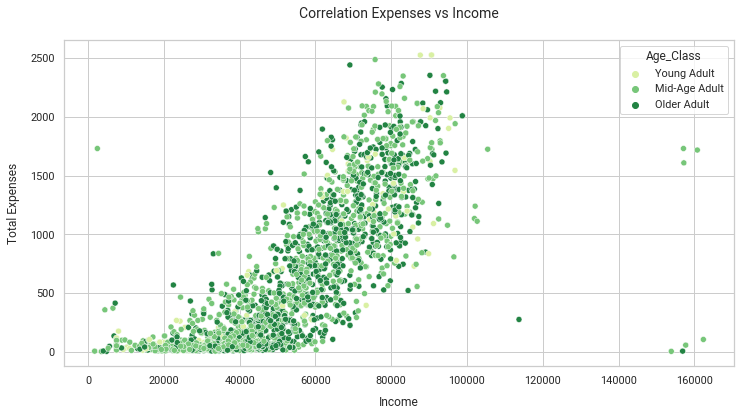

In [47]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='Income', y='Expenses', hue='Age_Class', palette='YlGn')
plt.title('Correlation Expenses vs Income\n', size=14)
plt.ylabel('Total Expenses', labelpad=10)
plt.xlabel('Income', labelpad=10);

Dari hasil uji korelasi diatas, diketahui bahwa hubungan korelasi antara `Expenses` dan `Income` adalah hubungan positif (nilai correlation coefficient = 0.853119) dan hubungannya sangat kuat. Sehingga dapat disimpulkan bahwa semakin tinggi `Income` customer, maka semakin banyak `Expense` dari customer tersebut.

### **Business Question 4**

Customer dengan `Marital_Status` seperti apa yang melakukan pembelian produk paling banyak dalam 2 tahun terakhir?

In [48]:
# Menampilkan median 'Income' berdasarkan dan 'Marital Status'
df.groupby('Marital_Status').median()[['Income']]

,Income
Marital_Status,
Single,48789.0
Together,51369.0
Married,51876.0
Divorced,53034.0
Widow,56551.0


Dilihat dari tabel summary diatas, untuk nilai median `Income` berdasarkan `Marital_Status`nya tidak dapat dipastikan apakah berbeda signifikan atau tidak. Sehingga untuk menguji hipotesis tersebut, saya akan melakukan uji statistik dengan Kruskal Wallis.

In [49]:
# Menampilkan nilai unik dari 'Marital_Status' untuk looping
marital = df['Marital_Status'].unique()
marital

['Single', 'Together', 'Married', 'Divorced', 'Widow']
Categories (5, object): ['Single', 'Together', 'Married', 'Divorced', 'Widow']

In [50]:
# Hypothesis
# Ho: Median income dari kelima kelompok 'Marital_Status' adalah SAMA
# Ha: Minimal ada 1 median income dari kelima kelompok 'Marital_Status' yang berbeda

stat, pvalue = kruskal(*[df[df['Marital_Status'] == i]['Income'] for i in marital])

if pvalue > 0.05:
    print(f'pvalue = {pvalue:5f}. pvalue > 0.05. Fail to reject Ho.\nTIDAK punya cukup bukti bahwa minimal ada 1 median income dari kelima kelompok \'Marital_Status\' yang berbeda')
else:
    print(f'pvalue = {pvalue:5f}. pvalue <= 0.05. Reject Ho.\nPunya cukup bukti bahwa minimal ada 1 median income dari kelima kelompok \'Marital_Status\' yang berbeda')

pvalue = 0.200279. pvalue > 0.05. Fail to reject Ho.
TIDAK punya cukup bukti bahwa minimal ada 1 median income dari kelima kelompok 'Marital_Status' yang berbeda


Dari hasil uji statistik diatas menunjukkan bahwa median `Income` customer berdasarkan `Marital_Status`-nya dinyatakan *tidak berbeda signifikan* (pvalue = 0.200279, Failed to reject Ho).

In [51]:
# Menampilkan `Marital_Status` yang paling banyak mengeluarkan uang untuk membeli produk
df.groupby('Marital_Status').sum()[['Expenses']].sort_values('Expenses',ascending=False)

,Expenses
Marital_Status,
Married,506885
Together,346954
Single,292512
Divorced,141601
Widow,55325


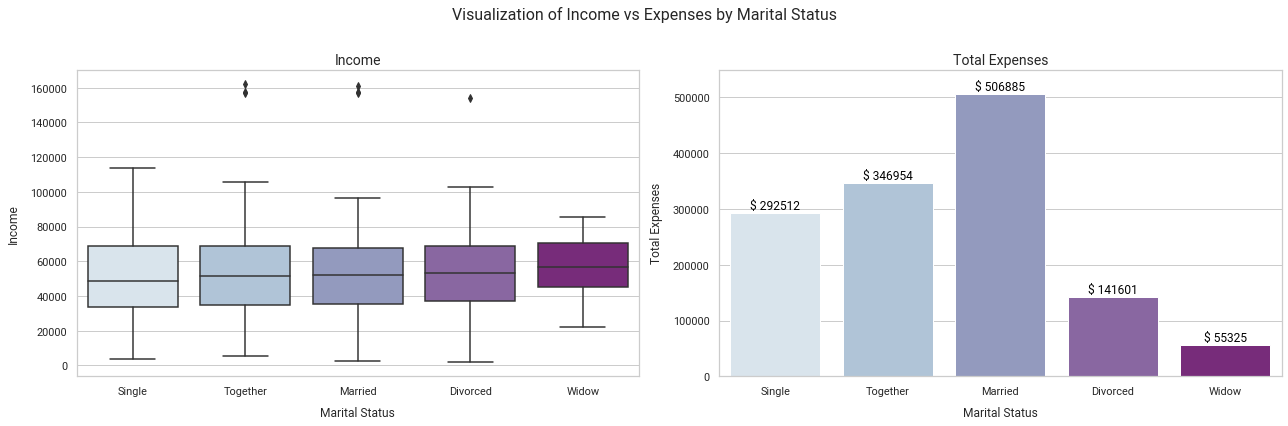

In [52]:
fig = plt.figure(figsize=(18,6))

fig.suptitle('Visualization of Income vs Expenses by Marital Status\n', size=16)

plt.subplot(1,2,1)
sns.boxplot(data=df, x='Marital_Status', y='Income', palette='BuPu')
plt.title('Income', size=14)
plt.xlabel('Marital Status',labelpad=10)
plt.ylabel('Income',labelpad=10)

plt.subplot(1,2,2)
ax = sns.barplot(data=df, x='Marital_Status', y='Expenses', estimator=sum, ci= 0, palette='BuPu')
plt.title('Total Expenses', size=14)
plt.xlabel('Marital Status',labelpad=10)
plt.ylabel('Total Expenses',labelpad=10)
plt.ylim(0,550000)
for p in ax.patches:
    ax.annotate(f'$ {p.get_height()}', (p.get_x()+0.4, p.get_height()+25000), ha='center', va='top', color='black', size=12)

plt.tight_layout();

In [53]:
# Proporsi customer berdasarkan 'Marital_Status'-nya
round(df['Marital_Status'].value_counts()/len(df)*100,1)

Married     38.7
Together    25.8
Single      21.6
Divorced    10.4
Widow        3.4
Name: Marital_Status, dtype: float64

Berdasarkan grafik diatas, diketahui bahwa:
- Median `Income` dari masing-masing `Marital_Status` tidak berbeda signifikan.
- Terdapat beberapa outlier pada `Income` kelompok Together, Married, dan Divorced.
- Customer yang sudah menikah (Married) menjadi kelompok customer yang paling banyak melakukan pembelian produk dalam 2 tahun terakhir sebanyak $506.888.
- Customer Widow paling sedikit melakukan pembelian produk sebesar $55.325.

Dari perbandingan `Income` dan `Expenses` dari masing-masing kelompok status perkawinan, ternyata kelompok Married menjadi kelompok dengan daya beli tertinggi. Hal ini sejalan dengan banyaknya proporsi jumlah customer berdasarkan `Marital_Status`-nya yang dimana kelompok Married adalah kelompok customer terbanyak dari kelompok lainnya yaitu sebesar 38.7% dari total populasi. 

Namun dari median `Income` yang tidak berbeda signifikan, ternyata menunjukkan daya beli yang berbeda signifikan. Hal ini dapat diperkirakan bahwa apabila sudah menikah, maka kebutuhan hidup juga semakin meningkat sehingga daya beli juga menjadi lebih tinggi.

### **Business Question 5**

Bagaimana hubungan korelasi antara `Expense`, `Income`, dan `Num_Children`?

In [54]:
# Menampilkan median 'Income' berdasarkan jumlah 'Num_Children' customer
df.groupby('Num_Children', as_index=False)[['Income']].median()

,Num_Children,Income
0,0,72174.5
1,1,47215.5
2,2,44064.5
3,3,44277.0


Dari table summary diatas, dapat diketahui bahwa untuk customer yang belum memiliki anak memiliki median `Income` yang lebih tinggi dari kelompok lainnya. Namun customer dengan 1, 2, dan 3 anak tidak diketahui apakah median `Income`-nya berbeda signifikan atau tidak. Sehingga untuk menguji hipotesis tersebut, saya akan melakukan uji statistik menggunakan Mann-Whitney. Uji statistik dilakukan dua kali dengan membandingkan median `Income` customer dengan 1 anak vs 2 anak dan median `Income` customer dengan 2 anak vs 3 anak.

In [55]:
# Hypothesis
# Ho: Median 'Income' customer dengan 1 anak = median 'Income' customer dengan 2 anak
# Ha: Median 'Income' customer dengan 1 anak != median 'Income' customer dengan 2 anak

stat, pvalue = mannwhitneyu(
    df[df['Num_Children']== 1 ]['Income'],
    df[df['Num_Children']== 2 ]['Income'],
)

if pvalue > 0.05:
    print(f"pvalue = {pvalue:5f}. pvalue > 0.05. Fail to reject Ho.\nTIDAK punya cukup bukti bahwa median 'Income' customer dengan 1 anak != median 'Income' customer dengan 2 anak")
else:
    print(f"pvalue = {pvalue:5f}. pvalue <= 0.05. Reject Ho.\nKita punya cukup bukti bahwa median 'Income' customer dengan 1 anak != median 'Income' customer dengan 2 anak")

pvalue = 0.006573. pvalue <= 0.05. Reject Ho.
Kita punya cukup bukti bahwa median 'Income' customer dengan 1 anak != median 'Income' customer dengan 2 anak


In [56]:
# Hypothesis
# Ho: Median 'Income' customer dengan 2 anak = median 'Income' customer dengan 3 anak
# Ha: Median 'Income' customer dengan 2 anak != median 'Income' customer dengan 3 anak

stat, pvalue = mannwhitneyu(
    df[df['Num_Children']== 2 ]['Income'],
    df[df['Num_Children']== 3 ]['Income']
)

if pvalue > 0.05:
    print(f"pvalue = {pvalue:5f}. pvalue > 0.05. Fail to reject Ho.\nTIDAK punya cukup bukti bahwa median 'Income' customer dengan 2 anak != median 'Income' customer dengan 3 anak")
else:
    print(f"pvalue = {pvalue:5f}. pvalue <= 0.05. Reject Ho.\nKita punya cukup bukti bahwa median 'Income' customer dengan 2 anak != median 'Income' customer dengan 3 anak")

pvalue = 0.589457. pvalue > 0.05. Fail to reject Ho.
TIDAK punya cukup bukti bahwa median 'Income' customer dengan 2 anak != median 'Income' customer dengan 3 anak


Dari hasil uji statistik diatas, diketahui bahwa:
- Median `Income` customer dengan 1 anak berbeda signifikan dengan customer dengan 2 anak (pvalue = 0.006573).
- Median `Income` customer dengan 2 anak *tidak* berbeda signifikan dengan customer dengan 3 anak (pvalue = 0.589457).

In [57]:
# Menampilkan 'Expenses' berdasarkan jumlah 'Num_Children' customer
df.groupby('Num_Children', as_index=False)[['Expenses']].sum()

,Num_Children,Expenses
0,0,697769
1,1,530091
2,2,102642
3,3,12775


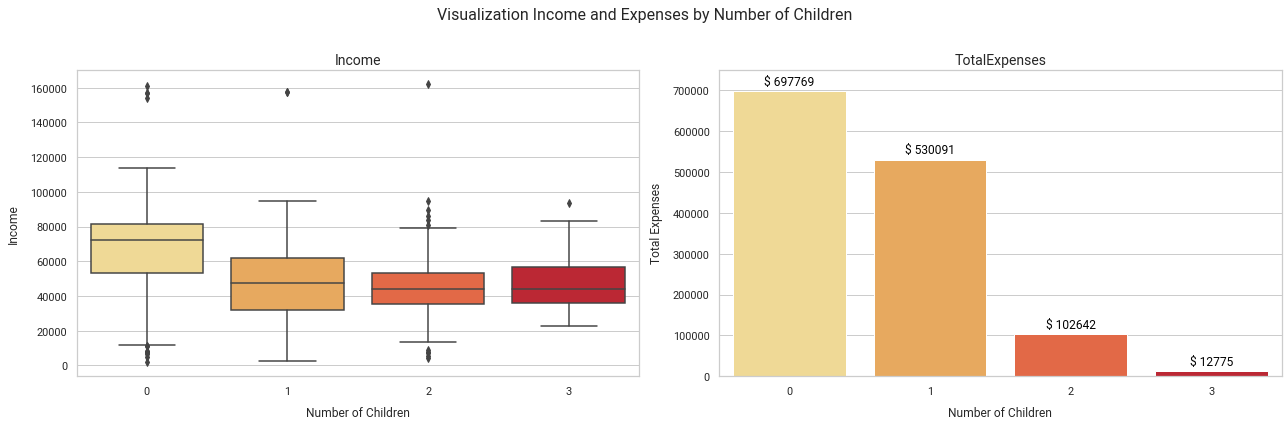

In [58]:
fig = plt.figure(figsize=(18,6))

fig.suptitle('Visualization Income and Expenses by Number of Children\n', size=16)

plt.subplot(1,2,1)
sns.boxplot(data=df, y='Income', x= 'Num_Children', palette='YlOrRd')
plt.title('Income', size=14)
plt.xlabel('Number of Children',labelpad=10)
plt.ylabel('Income',labelpad=10)

plt.subplot(1,2,2)
a2 = sns.barplot(data=df, y='Expenses', x= 'Num_Children', palette='YlOrRd', estimator=sum, ci=0)
plt.title('TotalExpenses', size=14)
plt.xlabel('Number of Children',labelpad=10)
plt.ylabel('Total Expenses',labelpad=10)
plt.ylim(0,750000)
for p in a2.patches:
    a2.annotate(f'$ {p.get_height()}', (p.get_x()+0.4, p.get_height()+40000), ha='center', va='top', color='black', size=12)

plt.tight_layout();

Berdasarkan grafik diatas, kita dapat mengetahui bahwa:
- Median `Income` dari customer yang belum memiliki anak (`Num_Children` = 0) lebih tinggi daripada kelompok lainnya.
- Customer yang belum memiliki anak juga menjadi kelompok dengan `Expenses` tertinggi ($697.769), sedangkan `Expenses` dari customer dengan 3 anak adalah yang paling rendah ($12.775).
- Range `Income` customer yang belum mempunyai anak lebih lebar dari kelompok lainnya.
- Terdapat beberapa outlier pada masing-masing kelompok `Num_Children`.

Dari data diatas dapat diinterpretasikan bahwa customer yang belum memiliki anak expensenya yang lebih tinggi karena belum memiliki kebutuhan untuk anak dibandingkan dengan customer yang memiliki 2 / 3 anak. Ditambah perusahaan juga tidak menjual produk yang berhubungan dengan kebutuhan anak, sehingga customer yang memiliki 2 / 3 anak pun hanya membelikan produk yang dibutuhkan saja.

Dari analisa tersebut, selanjutnya saya ingin mengetahui bagaimana hubungan korelasi antara `Expenses`, `Income`, dan `Num_Children`. 

In [59]:
# Melakukan uji korelasi 'Expenses', 'Income', dan 'Num_Children'
corr = df[['Expenses','Income','Num_Children']].corr('spearman').loc[['Num_Children']]
corr

,Expenses,Income,Num_Children
Num_Children,-0.483948,-0.375782,1.0


In [60]:
# Membuat fungsi untuk menentukan hubungan korelasi jika nilai (r) negatif
def arah_negative (nilai):
    if (nilai >= -0.2):
        return('Hubungannya sangat lemah')
    elif (-0.2 >= nilai >= -0.4):
        return('Hubungannya lemah')
    elif (-0.4 >= nilai >= -0.6):
        return('Hubungannya moderate')
    elif (-0.6 >= nilai >= -0.8):
        return('Hubungannya kuat')
    else:
        return('Hubungannya sangat kuat')

print(f'Hasil Correlation Coefficient (r) Num_Children vs Expenses = {corr.iloc[:,0][0]:5f}')
print(f'{hubungan(corr.iloc[:,0][0])}')
print(f'Nilai {corr.iloc[:,0][0]:5f}: {arah_negative(corr.iloc[:,0][0])}')

Hasil Correlation Coefficient (r) Num_Children vs Expenses = -0.483948
Hubungan korelasi negatif
Nilai -0.483948: Hubungannya moderate


In [61]:
print(f'Hasil Correlation Coefficient (r) Num_Children vs Income = {corr.iloc[:,1][0]:5f}')
print(f'{hubungan(corr.iloc[:,1][0])}')
print(f'Nilai {corr.iloc[:,1][0]:5f}: {arah_negative(corr.iloc[:,1][0])}')

Hasil Correlation Coefficient (r) Num_Children vs Income = -0.375782
Hubungan korelasi negatif
Nilai -0.375782: Hubungannya lemah


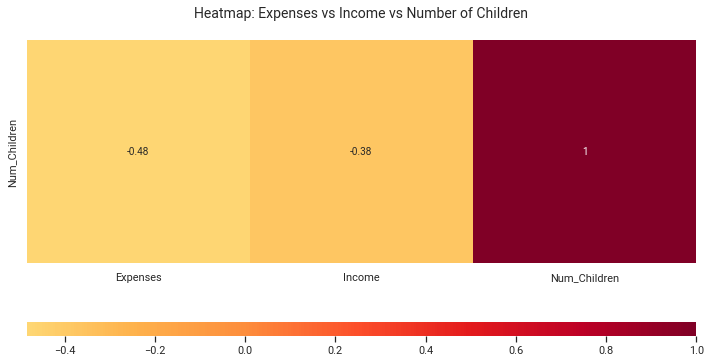

In [62]:
grid_kw = {'height_ratios':(20,1), 'hspace':0.2}

fig, (ax_top,ax_bottom) = plt.subplots(nrows=2, figsize=(12,6), gridspec_kw=grid_kw)
ax_top = sns.heatmap(
    corr,
    annot=True,
    ax=ax_top,
    cbar_ax=ax_bottom,
    cbar_kws={'orientation':'horizontal'},
    cmap='YlOrRd',
    center=0,
    square=True
)

ax_top.set_title('Heatmap: Expenses vs Income vs Number of Children\n', size=14);


Dari hasil uji korelasi diatas, diketahui bahwa:
- `Num_Children` dan `Expenses`
    - Hubungannya negatif (nilai correlation coefficient = -0.483948) dan kekuatan hubungannya moderate.
    - Interpretasi: semakin banyak jumlah anak yang dimiliki customer, maka semakin sedikit `Expense` dari customer tersebut. 
<br><br>
- `Num_Children` dan `Income`
    - Hubungannya negatif (nilai correlation coefficient = -0.375782) dan kekuatan hubungannya lemah.
    - Interpretasi: semakin banyak jumlah anak yang dimiliki customer, maka semakin menurun `Income` dari customer tersebut. 

Jika dibandingkan ketiga variabel diatas, maka variabel `Expenses` yang memiliki hubungan lebih kuat dengan `Num_Children` daripada variabel `Income`.

### **Business Question 6**

Pada purchase source manakah customer lebih banyak membeli produknya (web, catalog, store)?

In [63]:
# Membuat dataframe berupa total purchase dari masing-masing purchase source
my_col = list(df.iloc[:,19:22].columns)

purchase_source = pd.DataFrame()
purchase_source['source'] = ['Web','Catalog','Store']
purchase_source['total_purchase'] = [df[i].sum() for i in my_col]
purchase_source['%'] = round(purchase_source['total_purchase']/purchase_source['total_purchase'].sum() * 100,2)
purchase_source

,source,total_purchase,%
0,Web,9043,32.53
1,Catalog,5911,21.26
2,Store,12844,46.20


In [64]:
# Membuat dataframe korelasi pembelian berdasarkan purchase source dengan beberapa variabel 
corr_2 = df[['NumWebPurchases','NumStorePurchases','NumCatalogPurchases','Age','Income','Num_Children']].corr('spearman')

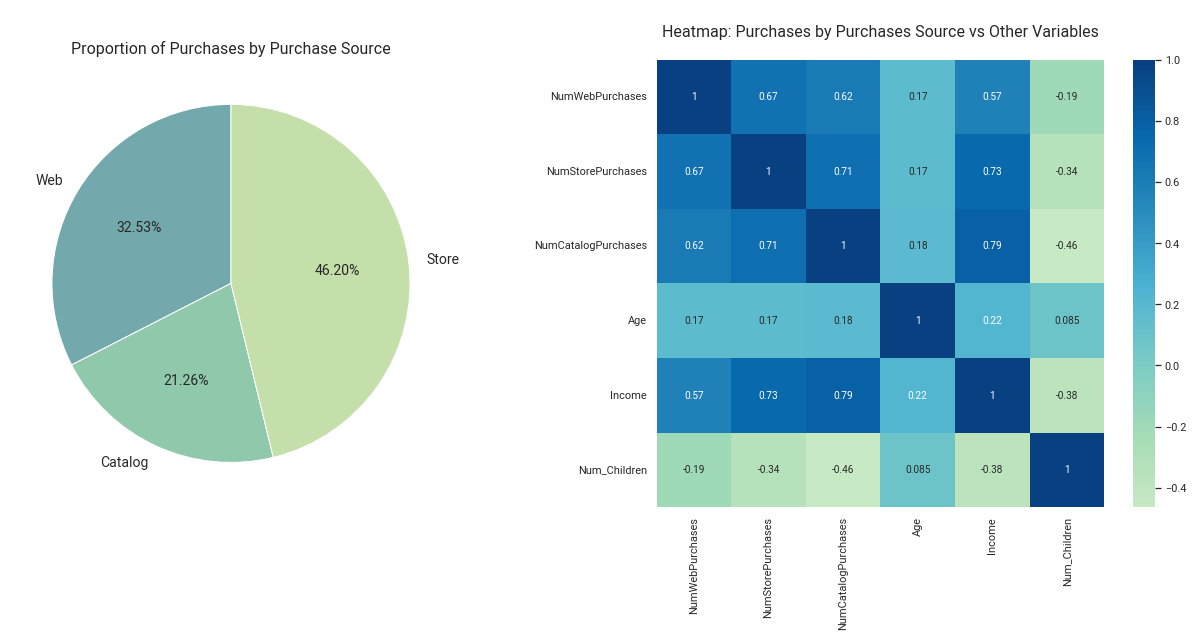

In [65]:
# Menampilkan pie chart
myColor = ['#73A9AD', '#90C8AC', '#C4DFAA']

plt.figure(figsize=(18,8),facecolor='white')

plt.subplot(1,2,1)
plt.pie(
    x=purchase_source['%'],
    labels=purchase_source['source'],
    autopct=f'%.2f%%',
    startangle=90,
    textprops={'fontsize': 14},
    colors= myColor)
plt.title('Proportion of Purchases by Purchase Source', size=16)

# Menampilkan heatmap 
plt.subplot(1,2,2)
plt.title('\nHeatmap: Purchases by Purchases Source vs Other Variables\n', size=16)
sns.heatmap(corr_2, center=0, annot=True, cmap='GnBu', square=True)

plt.tight_layout();


Berdasarkan grafik diatas, kita dapat mengetahui bahwa:
- Proporsi pembelian terbesar adalah melalui Store (46.20%)
- Proporsi pembelian terkecil adalah melalui Catalog (21.26%)

Selain itu, saya juga melakukan uji korelasi untuk melihat hubungan total purchase berdasarkan purchase sourcenya dengan variabel lain. Dari hasil uji korelasi dan grafik heatmap diatas, didapatkan insight berupa:
- Variabel yang memiliki korelasi positif terkuat adalah `NumCatalogPurchases` dengan `Income` = 0.79
- Variabel yang memiliki korelasi negatif terkuat adalah `NumCatalogPurchases` dengan `Num_Children` = -0.46

Dari penjelasan diatas dapat diinterpretasikan bahwa customer lebih banyak yang berbelanja langsung ke Store daripada berbelanja via katalog. Namun pembelanjaan melalui katalog memiliki hubungan korelasi positif yang kuat dengan pendapatan customer, dimana semakin tinggi pendapatan customer maka semakin tinggi angka pembelanjaan via katalog. Hal ini disebabkan karena secara [teori](https://hbr.org/2022/07/how-paper-catalogs-remain-relevant-in-a-digital-age), produk yang bernilai mahal lebih menguntungkan untuk dipasarkan via katalog, oleh karena itu dapat diasumsikan pengguna katalog adalah para customer yang tingkat pendapatannya tinggi.

Selain itu pembelanjaan via katalog memiliki hubungan korelasi negatif yang kekuatannya moderat dengan jumlah anak, dimana semakin sedikit jumlah anak yang dimiliki maka semakin tinggi angka pembelanjaan via katalog. Hal ini sejalan dengan penjelasan pada business question sebelumnya dimana populasi customer dalam 2 tahun terakhir berdasarkan tingkat pendapatannya didominasi oleh customer yang belum memiliki anak. 

In [66]:
# Table summary dari total purchase berdasarkan purchase source dan Income_Class & Num_Children
display(
    df.groupby('Income_Class').sum().iloc[:,14:17].T,
    df.groupby('Num_Children').sum().iloc[:,13:16].T)

Income_Class,Low,Medium,High
NumWebPurchases,1112,4991,2940
NumCatalogPurchases,263,2484,3164
NumStorePurchases,1637,6569,4638


Num_Children,0,1,2,3
NumWebPurchases,2785,4765,1352,141
NumCatalogPurchases,3013,2395,453,50
NumStorePurchases,4595,6260,1801,188


### **Business Question 7**

Bagaimana respon customer terhadap marketing campaign yang telah dibuat? 

In [67]:
# Menampilkan jumlah respon customer terkait campaign dari marketing
acc_cmp_1 = pd.Series(data=['Yes' if i > 0 else 'No' for i in df['Total_AccCmp']]).value_counts().to_frame().reset_index().rename(columns={0:'Total','index':'Acc_Cmp'})
acc_cmp_1['%'] = round(acc_cmp_1['Total']/acc_cmp_1['Total'].sum()*100,2)
acc_cmp_1

,Acc_Cmp,Total,%
0,No,1608,72.69
1,Yes,604,27.31


In [68]:
# Menampilkan total respon customer terkait campaign berdasarkan jumlah keterlibatannya dalam setiap campaign
df['Total_AccCmp'].value_counts().to_frame().reset_index().rename(columns={'Total_AccCmp':'Total','index':'Num_Acc_Cmp'})

,Num_Acc_Cmp,Total
0,0,1608
1,1,368
2,2,139
3,3,51
4,4,36
5,5,10


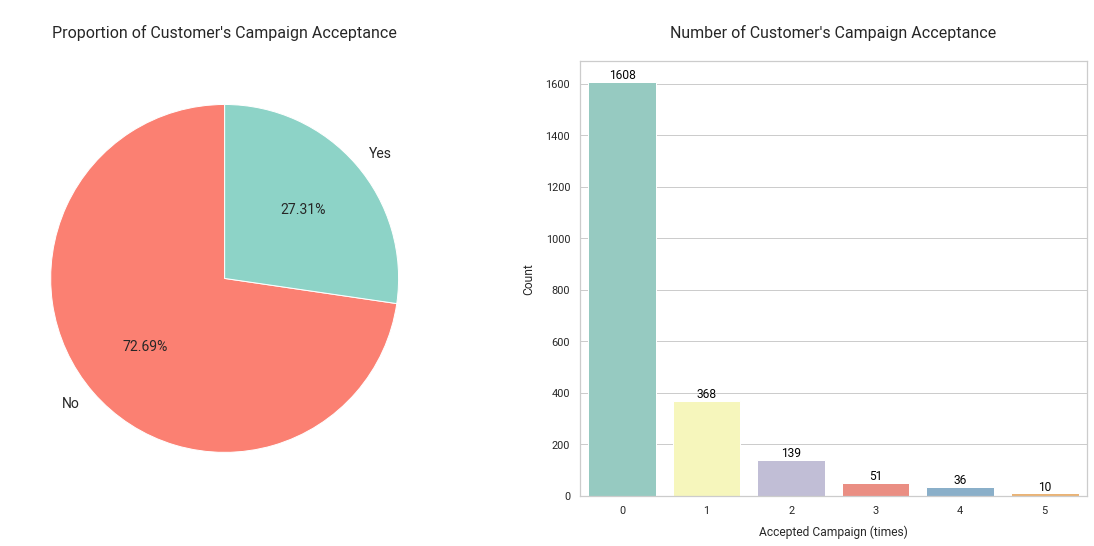

In [69]:
myColor = ['#fb8072', '#8dd3c7']

plt.figure(figsize=(20,8),facecolor='white')

plt.subplot(1,2,1)
plt.pie(
    x=acc_cmp_1['%'],
    labels=acc_cmp_1['Acc_Cmp'],
    autopct=f'%.2f%%',
    startangle=90,
    textprops={'fontsize': 14},
    colors= myColor
)
plt.title('\nProportion of Customer\'s Campaign Acceptance\n',size=16)


plt.subplot(1,2,2)
ax = sns.countplot(data=df, x='Total_AccCmp', palette='Set3')
plt.title('\nNumber of Customer\'s Campaign Acceptance\n',size=16)
plt.xlabel('Accepted Campaign (times)',labelpad=10)
plt.ylabel('Count',labelpad=10)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.4, p.get_height()+50), ha='center', va='top', color='black', size=12)

plt.tight_layout;

Dari table dan grafik diatas, diketahui bahwa:
- Hanya 27.31% customer yang pernah menerima penawaran dari campaign, minimal 1 kali.
- Jumlah penerimaan penawaran dari campaign menunjukkan perubahan dimana jumlah customer yang pernah menerima penawaran 1 kali terus menurun hingga jumlah customer yang menerima penawaran 5 kali.

Hal ini dapat diinterpretasikan bahwa campaign yang dilakukan masih kurang menarik perhatian customer melihat dari banyaknya campaign yang telah dilakukan, respon customer terus menunjukkan penurunan. Bahkan dari total populasi, lebih dari 70% customer tidak pernah terlibat dari campaign yang telah dilakukan. 

## **Kesimpulan**
---
Dari proses analisis data yang telah dilakukan, maka dapat dibuat kesimpulan sebagai berikut:

- Customer Older Adult adalah customer yang paling royal karena total uang yang dibelanjakan paling tinggi dalam 2 tahun terakhir daripada kelompok usia lainnya.
- Secara produk, customer Mid-Age Adult memiliki daya beli paling tinggi karena menjadi customer pembeli terbanyak pada 5 dari 6 produk yang dijual. Produk lainnya (Wine) dibeli paling banyak oleh customer Older Adult.
- `Expense` dan `Income` hubungannya berkorelasi positif dan sangat kuat, artinya semakin tinggi `Income` customer, maka semakin banyak `Expense` yang dikeluarkan.
- Customer yang sudah menikah adalah customer yang paling royal karena total uang yang dibelanjakan paling tinggi dalam 2 tahun terakhir daripada customer berdasarkan status perkawinan lainnya.
- Customer yang belum mempunyai anak adalah customer yang paling royal  karena total uang yang dibelanjakan paling tinggi dalam 2 tahun terakhir daripada customer berdasarkan jumlah anak lainnya.
- `Expenses` dan `Num_Children` hubungannya berkorelasi negatif dan kekuatan hubungannya moderate, artinya semakin banyak jumlah anak yang dimiliki customer, maka semakin sedikit `Expense` dari customer tersebut.
- Dari 3 purchase source (web, store, katalog), customer lebih banyak melakukan pembelanjaannya via store.
- Dari 3 purchase source, pembelian via katalog memiliki hubungan korelasi positif terkuat dengan pendapatan customer dan memiliki hubungan korelasi negatif terkuat dengan variabel jumlah anak customer.
- Dari total populasi customer, hanya 27.31% customer yang pernah menerima penawaran dari campaign, minimal 1 kali.


## **Rekomendasi**
---
- Apabila perusahaan ingin memperluas jangkauan pasar, disarankan untuk meningkatkan campaign kepada kelompok-kelompok yang total pembeliannya paling rendah dalam 2 tahun terakhir (young adult, customer widow, dan customer yang memiliki anak).
    - Tidak hanya kepada kelompok dengan total pembelian paling rendah, namun juga ditingkatkan marketing campaignnya kepada seluruh existing customer.
    - Apabila memungkinkan, menambahkan jenis produk yang dijual dengan lebih variatif.
- Pemberian reward kepada customer-customer yang paling royal agar meningkatkan daya belinya.
- Memaksimalkan penjualan pada purchase source via katalog dan web. Jika ingin meningkatkan revenue, maka penjualan via katalog dapat lebih diutamakan karena lebih banyak digunakan oleh customer yang tingkat pendapatannya tinggi.
